In [2]:
from torchvision.datasets import Cityscapes

import torch
print(torch.__version__)
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import sys

2.1.2


In [3]:
print('__Python VERSION: ', sys.version)
print('__PyTorch VERSION: ', torch.__version__)
print('__CUDA VERSION', )
print('__CUDNN VERSION:', torch.backends.cudnn.version())
print('__Number CUDA Devices:', torch.cuda.device_count())
print('__Devices')
print('Active CUDA Device: GPU', torch.cuda.current_device())
print('Available devices ', torch.cuda.device_count())
print('Current cuda device ', torch.cuda.current_device())

__Python VERSION:  3.8.18 (default, Sep 11 2023, 13:39:12) [MSC v.1916 64 bit (AMD64)]
__PyTorch VERSION:  2.1.2
__CUDA VERSION
__CUDNN VERSION: 8700
__Number CUDA Devices: 1
__Devices
Active CUDA Device: GPU 0
Available devices  1
Current cuda device  0


In [4]:
# Check if GPU is avaliable on your system
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Training on {device}")

Training on cuda


In [5]:
# Set the seed for generating random numbers
seed = 1904
torch.manual_seed(seed)
np.random.seed(seed)

In [6]:
import torchvision.transforms as transforms
import augmentations as A

# Define the transformations
data_transforms = transforms.Compose([
    transforms.ToTensor(),  # Convert PIL Image to PyTorch Tensor
    transforms.Resize((256,256))
])

# Define a list of transformations
augment_tranmforms = [A.Resize((256, 256)),
                    A.RandomHorizontalFlip(),
                    A.RandomRotation(degrees=(-35, 35)),
                    A.RandomCropWithProbability(220, 0.5),
                    A.ToTensor()]

# Instanciate the Compose class with the list of transformations
augment_transforms = A.Compose(augment_tranmforms)


dataset_path = 'C:\\Users\\jakub\\Desktop\\TUe\\AIES\\Q3\\5LSM0-Neural-networks-for-computer-vision\\FinalAssignment\\archive'

# Create transformed train dataset
training_dataset = Cityscapes(dataset_path, split='train', mode='fine', target_type='semantic', transform=data_transforms, target_transform=data_transforms)

# Create augmented train dataset
augmented_dataset = Cityscapes(dataset_path, split='train', mode='fine', target_type='semantic', transform=data_transforms, target_transform=augment_transforms)

# Create transformed train dataset
validation_dataset = Cityscapes(dataset_path, split='val', mode='fine', target_type='semantic', transform=data_transforms, target_transform=data_transforms)

In [ ]:
# import matplotlib.pyplot as plt

# fig, axes = plt.subplots(4, 2, figsize=(10, 15))

# for i in range(4):
#     # TO DO: spec the fig size
#     img, lbl = training_dataset[i]

#     img_np = img.permute(1, 2, 0)
#     lbl_np = lbl.permute(1, 2, 0)

#     plt.subplot(4, 2, 2 * i + 1)
#     plt.imshow(img_np)
#     plt.title(f'RGB Image {i+1}')

#     plt.subplot(4, 2, 2 * i + 2)
#     plt.imshow(lbl_np)  # Adjust the colormap as needed
#     plt.title(f'Semantic Segmentation Label {i+1}')

# # Adjust layout to prevent overlap
# # plt.tight_layout()
    
# # Save a figure to a PNG format file
# # plt.savefig('Cityspace-test-vis.png')

# plt.show()

In [7]:
from torch.utils.data import ConcatDataset, DataLoader, random_split

# Combine the datasets
combined_dataset = ConcatDataset([training_dataset, augmented_dataset])

# Determine the lengths of the training and validation sets
total_size = len(combined_dataset)
train_size = int(0.8 * total_size)  # 80% for training
val_size = total_size - train_size  # 20% for validation

# Split the datasets
train_dataset, val_dataset = random_split(combined_dataset, [train_size, val_size])

# Create the dataloaders
# train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2, 
#                                 pin_memory=True if torch.cuda.is_available() else False)
# val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=2, 
#                                 pin_memory=True if torch.cuda.is_available() else False)

In [8]:
# # Create training and validation dataloaders
train_loader = torch.utils.data.DataLoader(training_dataset, batch_size=2, shuffle=True, generator=torch.Generator().manual_seed(seed))

val_loader = torch.utils.data.DataLoader(validation_dataset, batch_size=2, shuffle=True, generator=torch.Generator().manual_seed(seed))


In [ ]:
# Create a test dataset
# Create transformed train dataset
test_dataset = Cityscapes(dataset_path, split='test', mode='fine', target_type='semantic', transform=data_transforms, target_transform=data_transforms)
# Create a test data loader
# test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=2, shuffle=True, num_workers=2,
#                                             pin_memory=True if torch.cuda.is_available() else False)

#### Baseline UNet with CE

In [ ]:
# from model import Model
# # from models import MSU_Net
# # from RCNN_UNet import R2U_Net
# from model_vis import visualize_segmentation_cityscapes

# # Instanciate Model()
# eval_model = Model()

# # Specify the checkpoint file path
# checkpoint_path = 'C:\\Users\\jakub\\Desktop\\TUe\\AIES\\Q3\\5LSM0-Neural-networks-for-computer-vision\\FinalAssignment\\model_checkpoints\\model_e50_26Mar.pth'
# device = torch.device('cpu') 

# checkpoint = torch.load(checkpoint_path, map_location=device)
# eval_model.load_state_dict(checkpoint)

# # Call the function with the checkpoint path
# visualize_segmentation_cityscapes(eval_model, train_loader, num_examples=5)

#### Residual UNet (Res-UNet) with CE

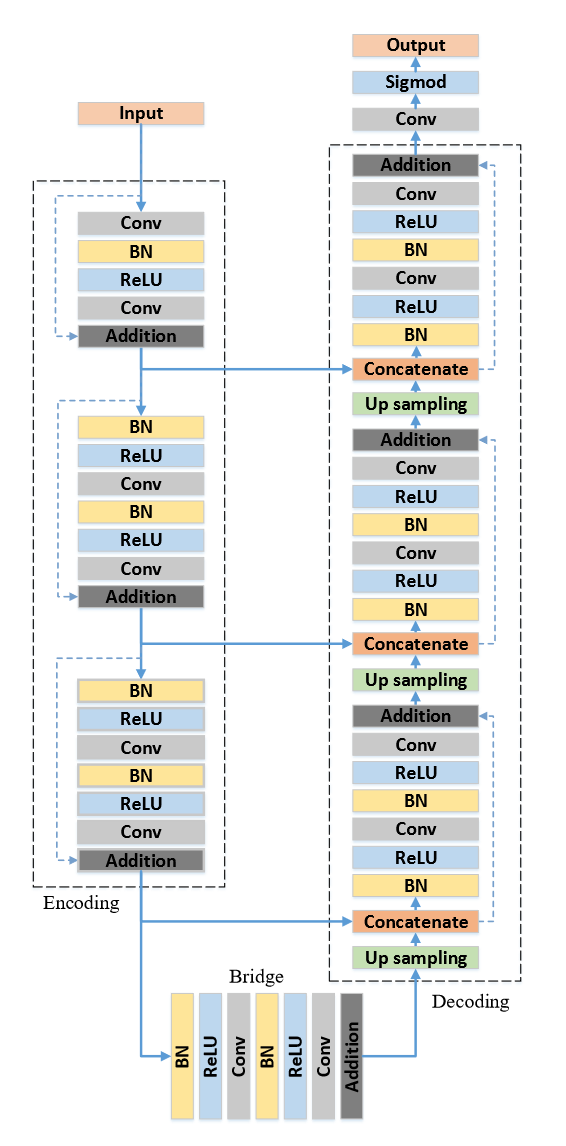



In [ ]:
# from model import Model
# # from models import MSU_Net
# from ResUNet import ResUNet
# from model_vis import visualize_segmentation_cityscapes

# # Instanciate Model()
# eval_model = ResUNet()

# # Specify the checkpoint file path
# checkpoint_path = 'C:\\Users\\jakub\\Desktop\\TUe\\AIES\\Q3\\5LSM0-Neural-networks-for-computer-vision\\FinalAssignment\\model_checkpoints\\model_ResUNet_CE_e100.pth'
# device = torch.device('cpu') 

# checkpoint = torch.load(checkpoint_path, map_location=device)
# eval_model.load_state_dict(checkpoint)

# # Call the function with the checkpoint path
# visualize_segmentation_cityscapes(eval_model, train_loader, num_examples=5)

#### Residual UNet with Focal Loss


In [ ]:
# from model import Model
# # from models import MSU_Net
# from ResUNet import ResUNet
# from model_vis import visualize_segmentation_cityscapes

# # Instanciate Model()
# eval_model = ResUNet()

# # Specify the checkpoint file path
# checkpoint_path = 'model_checkpoints\Res-UNet-FL-e100.pth'
# device = torch.device('cpu') 

# checkpoint = torch.load(checkpoint_path, map_location=device)
# eval_model.load_state_dict(checkpoint)

# # Call the function with the checkpoint path
# visualize_segmentation_cityscapes(eval_model, train_loader, num_examples=5)

#### Baseline UNet with Focal Loss

In [ ]:
# from model import Model
# # from models import MSU_Net
# # from RCNN_UNet import R2U_Net
# from model_vis import visualize_segmentation_cityscapes

# # Instanciate Model()
# eval_model = Model()

# # Specify the checkpoint file path
# checkpoint_path = 'C:\\Users\\jakub\\Desktop\\TUe\\AIES\\Q3\\5LSM0-Neural-networks-for-computer-vision\\FinalAssignment\\model_checkpoints\\model_UNet_FL_e80.pth'
# device = torch.device('cpu') 

# checkpoint = torch.load(checkpoint_path, map_location=device)
# eval_model.load_state_dict(checkpoint)

# # Call the function with the checkpoint path
# visualize_segmentation_cityscapes(eval_model, train_loader, num_examples=5)

#### Attention UNet with CE
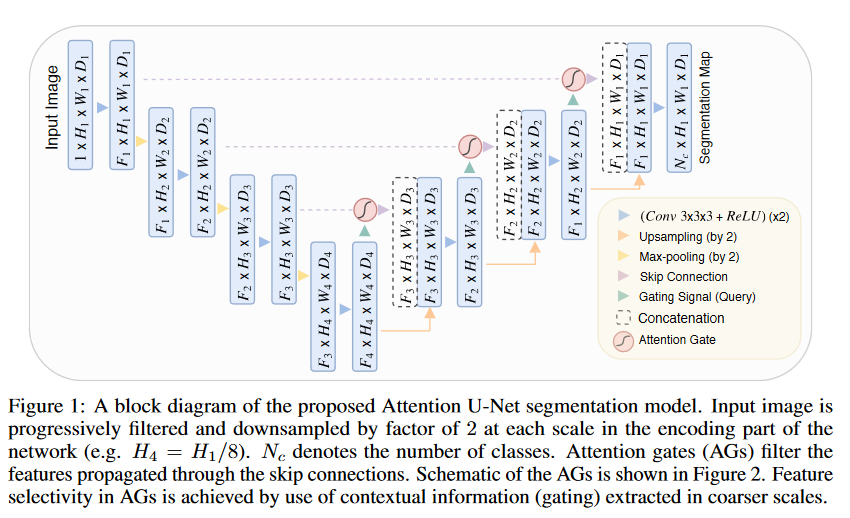

#### Attention Gate
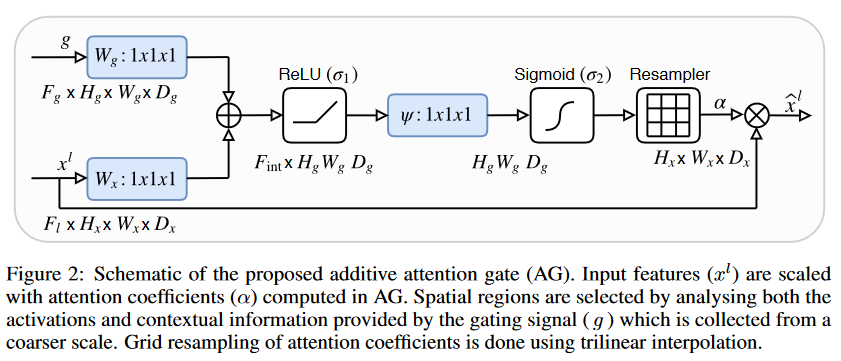

c:\Users\jakub\anaconda3\envs\experiments\lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


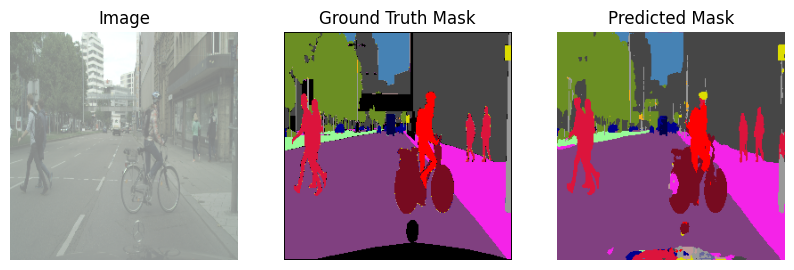

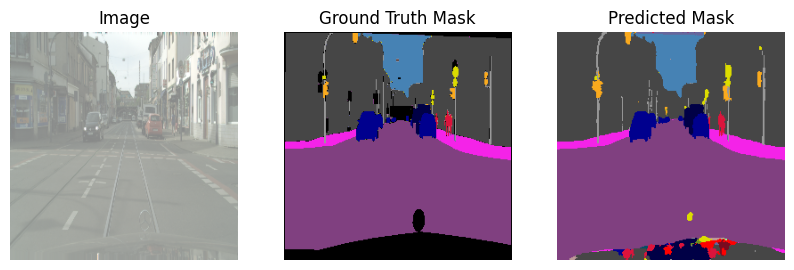

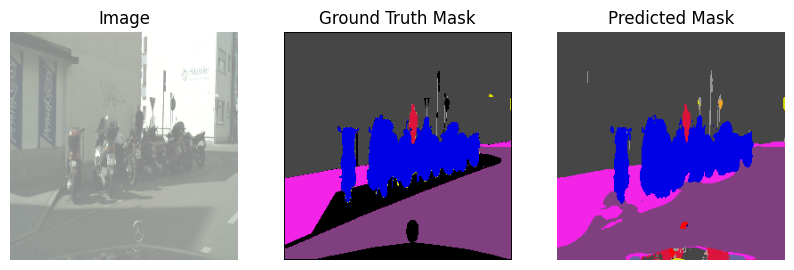

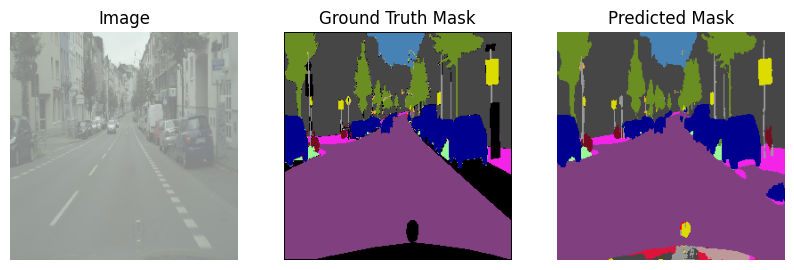

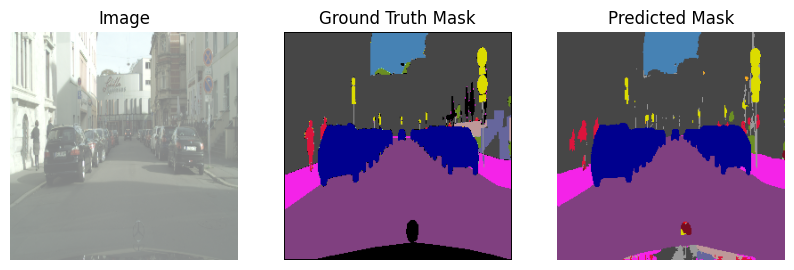

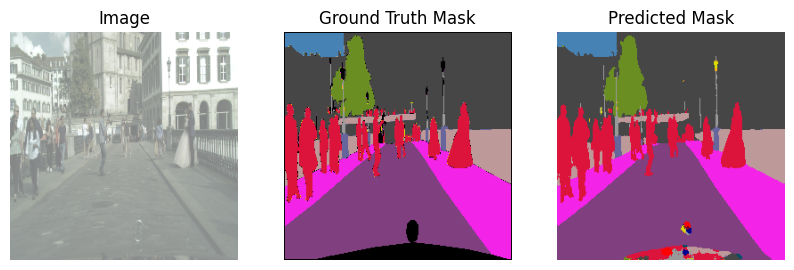

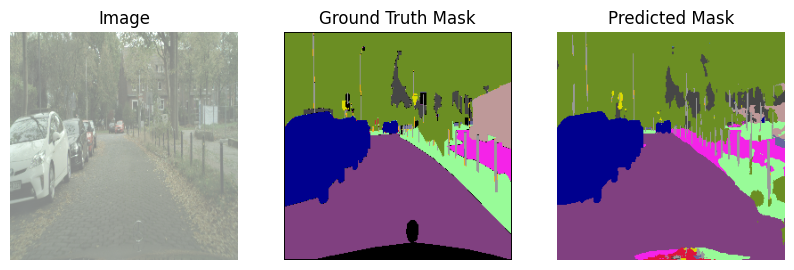

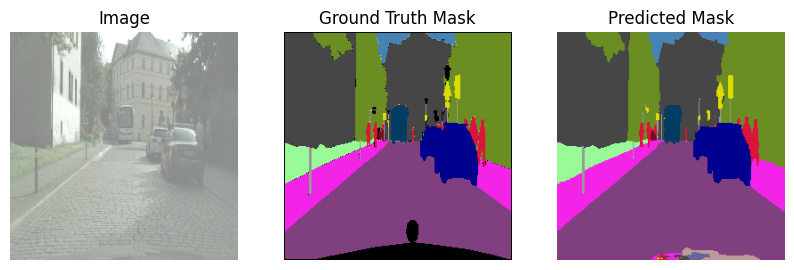

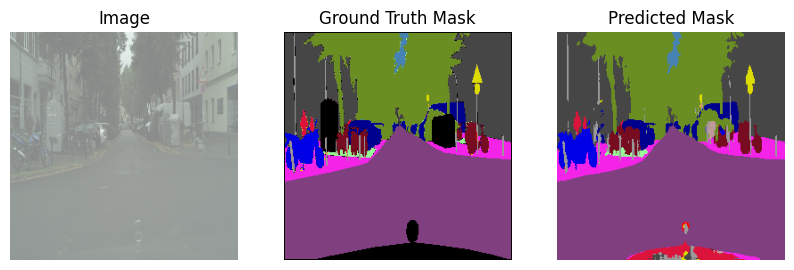

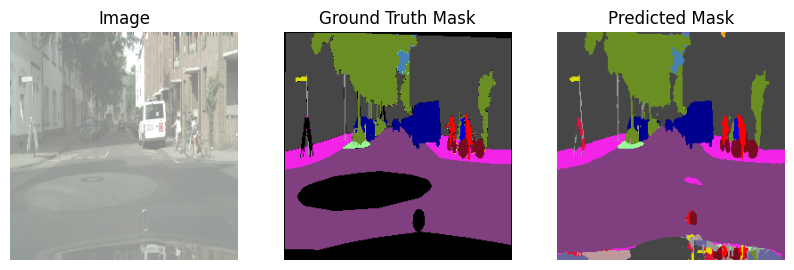

In [9]:
from model import Model
# from models import MSU_Net
# from RCNN_UNet import R2U_Net
from Att_UNet import Att_UNet
from model_vis import visualize_segmentation_cityscapes

# Instanciate Model()
eval_model = Att_UNet()

# Specify the checkpoint file path
checkpoint_path = 'model_checkpoints\AttUNet_CE_e100.pth'
device = torch.device('cpu') 

checkpoint = torch.load(checkpoint_path, map_location=device)
eval_model.load_state_dict(checkpoint)

# Call the function with the checkpoint path
visualize_segmentation_cityscapes(eval_model, train_loader, num_examples=5)

#### Multi-scale UNet with CE

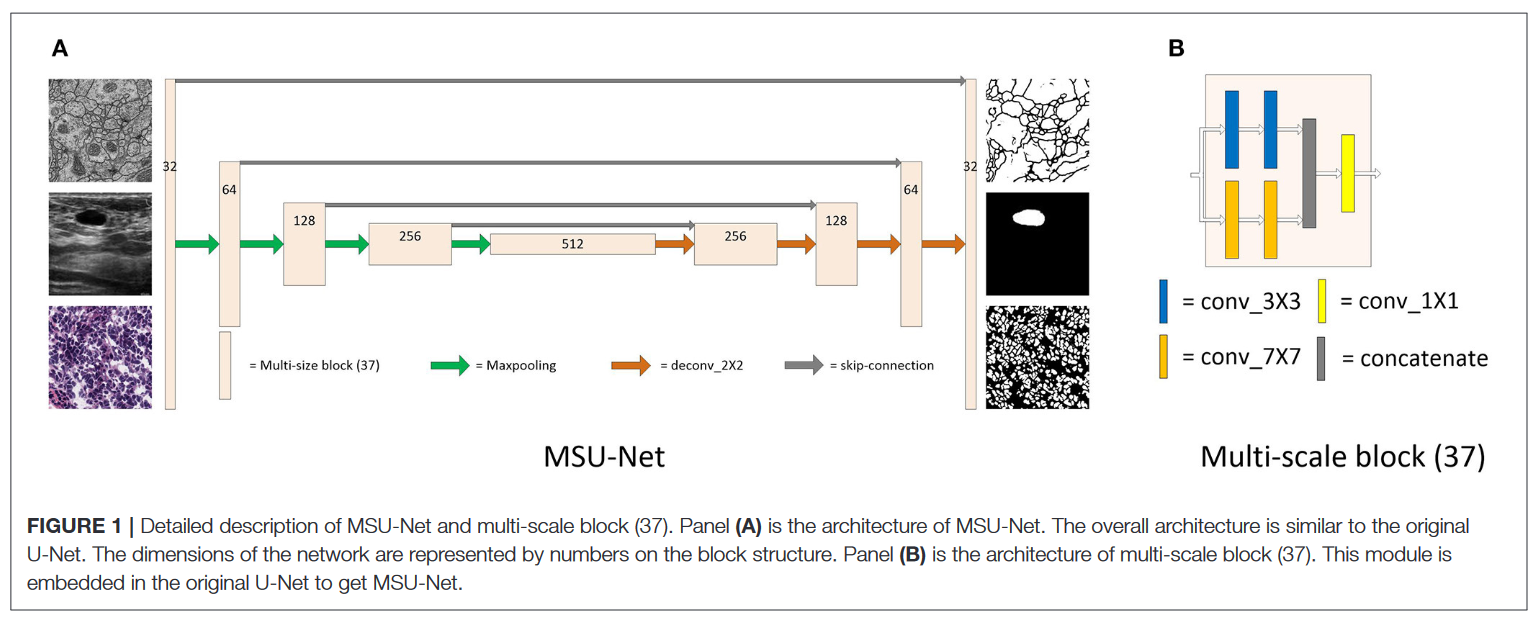

In [ ]:
# from model import Model
# from models import MSU_Net
# # from RCNN_UNet import R2U_Net
# # from Att_UNet import Att_UNet
# from model_vis import visualize_segmentation_cityscapes

# # Instanciate Model()
# eval_model = MSU_Net()

# # Specify the checkpoint file path
# checkpoint_path = 'model_checkpoints\MSU-Net-e40-CE.pth'
# device = torch.device('cpu') 

# checkpoint = torch.load(checkpoint_path, map_location=device)
# eval_model.load_state_dict(checkpoint)

# # Call the function with the checkpoint path
# visualize_segmentation_cityscapes(eval_model, train_loader, num_examples=5)

In [ ]:
# from model import Model
# from models import MSU_Net
# # from RCNN_UNet import R2U_Net
# # from Att_UNet import Att_UNet
# from model_vis import visualize_segmentation_cityscapes

# # Instanciate Model()
# eval_model = MSU_Net()

# # Specify the checkpoint file path
# checkpoint_path = 'model_checkpoints\MSUNet_CE_e52.pth'
# device = torch.device('cpu') 

# checkpoint = torch.load(checkpoint_path, map_location=device)
# eval_model.load_state_dict(checkpoint)

# # Call the function with the checkpoint path
# visualize_segmentation_cityscapes(eval_model, train_loader, num_examples=5)

#### Recurrent Residual Attention UNet

c:\Users\jakub\anaconda3\envs\experiments\lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


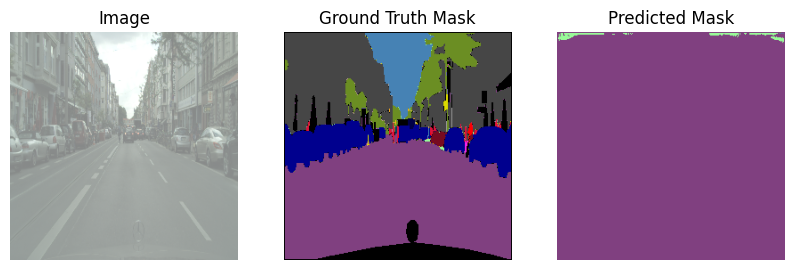

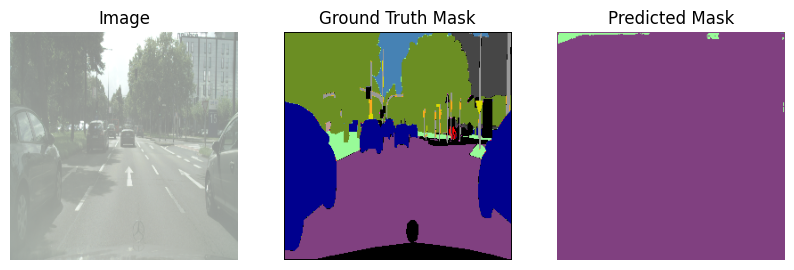

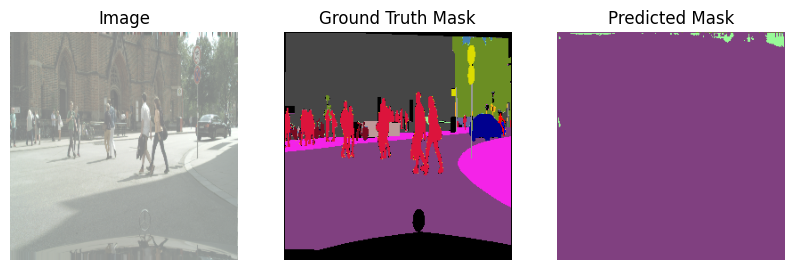

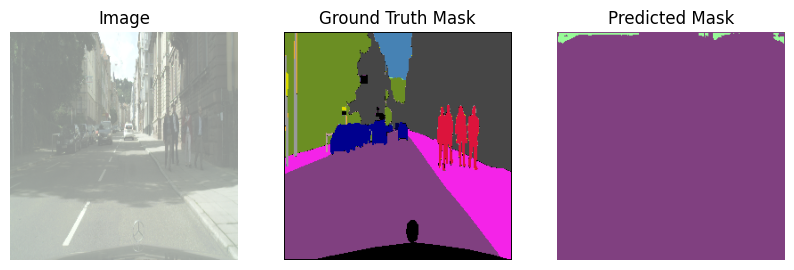

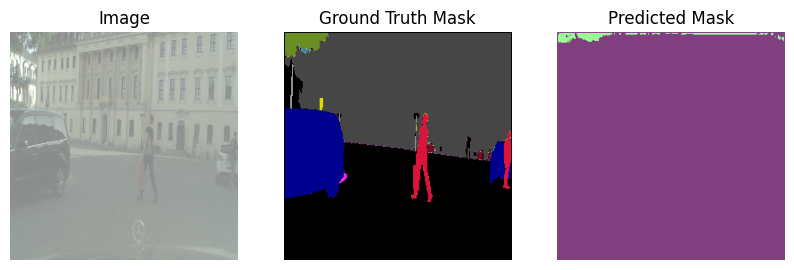

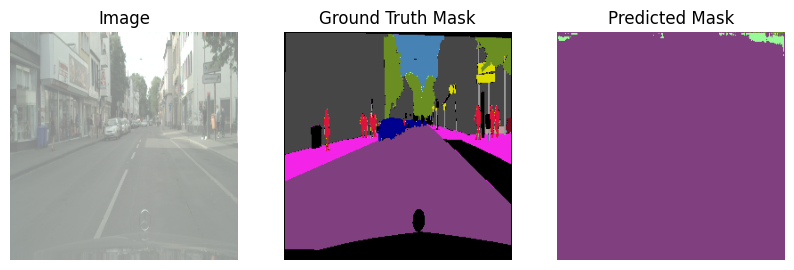

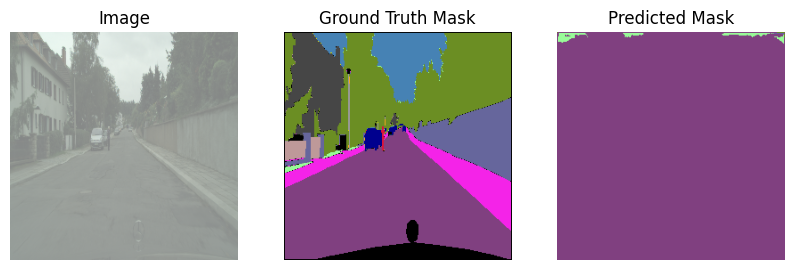

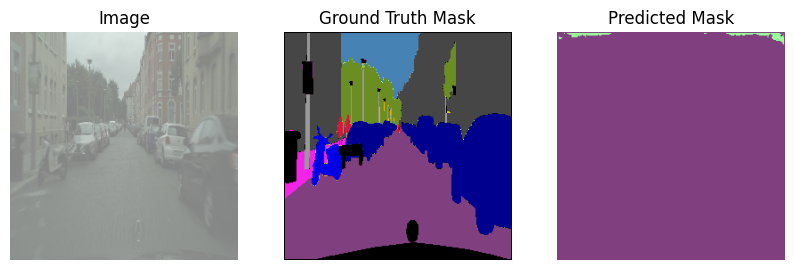

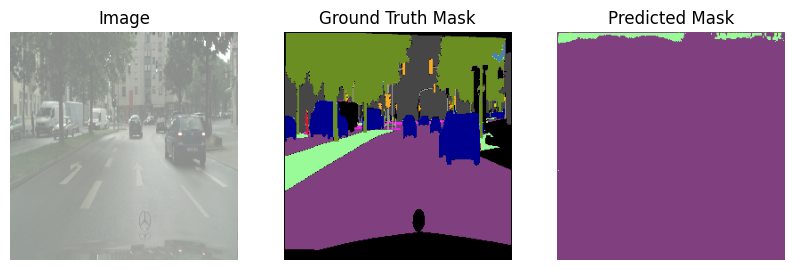

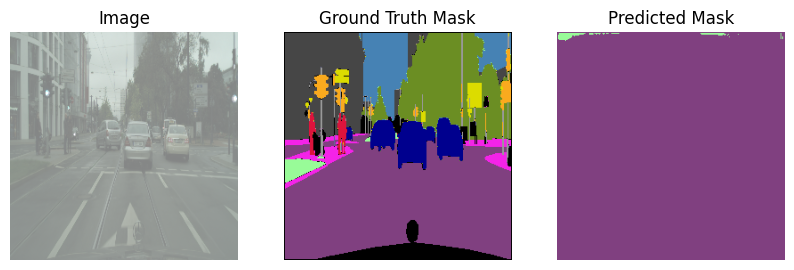

In [23]:
from R2AttU_Net import R2AttU_Net
from model_vis import visualize_segmentation_cityscapes

# Instanciate Model()
eval_model = R2AttU_Net()

# Specify the checkpoint file path
checkpoint_path = 'model_checkpoints\R2Att-UNet-CE-e90.pth'
device = torch.device('cpu') 

checkpoint = torch.load(checkpoint_path, map_location=device)
eval_model.load_state_dict(checkpoint)

# Call the function with the checkpoint path
visualize_segmentation_cityscapes(eval_model, train_loader, num_examples=5)

### Training Model

In [ ]:
# from model import Model
# import model_executables as mex
# from losses import FocalLoss

# # Instanciate the model
# UNet_model = Model()

# # Move the model to the GPU if avaliable
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# UNet_model = UNet_model.to(device)

# criterion = FocalLoss(ignore_index=255)
# optimizer = optim.Adam(UNet_model.parameters(), lr=0.01)

# # Train the instanciated model
# mex.train_model(UNet_model, train_loader, val_loader, num_epochs=2, patience=3, criterion=criterion, optimizer=optimizer)

In [ ]:
# from models import MSU_Net
# import model_executables as mex

# # Instanciate the model
# UNet_model = MSU_Net()

# # Move the model to the GPU if avaliable
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# UNet_model = UNet_model.to(device)

# criterion = nn.CrossEntropyLoss(ignore_index=255)
# optimizer = optim.Adam(UNet_model.parameters(), lr=0.01)

# # Train the instanciated model
# mex.train_model(UNet_model, train_loader, val_loader, num_epochs=2, patience=3, criterion=criterion, optimizer=optimizer)

In [ ]:
# from RCNN_UNet import R2U_Net

# # Instanciate the model
# UNet_model = R2U_Net()

# # Move the model to the GPU if avaliable
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# UNet_model = UNet_model.to(device)

# criterion = nn.CrossEntropyLoss(ignore_index=255)
# optimizer = optim.Adam(UNet_model.parameters(), lr=0.01)

# # Train the instanciated model
# mex.train_model(UNet_model, train_loader, val_loader, num_epochs=2, patience=3, criterion=criterion, optimizer=optimizer)

In [ ]:
# Load in the checkpoint file and saving a new one with soely the model.state_dict

# Instanciate Model()
# model = Model()

# Specify the checkpoint file path
# checkpoint_path = 'C:\\Users\\jakub\\Desktop\\TUe\\AIES\\Q3\\5LSM0-Neural-networks-for-computer-vision\\FinalAssignment\\model_checkpoints\\model_checkpoint_epoch_50.pth'
# device = torch.device('cpu') 

# checkpoint = torch.load(checkpoint_path, map_location=device)
# model.load_state_dict(checkpoint['model_state_dict'])

# torch.save(model.state_dict(), 'C:\\Users\\jakub\\Desktop\\TUe\\AIES\\Q3\\5LSM0-Neural-networks-for-computer-vision\\FinalAssignment\\model_checkpoints\\model.pth')

#### Model Evaluation


In [ ]:
# from metrics import IoU_score
# from Att_UNet import Att_UNet
# import utils

# # Load your model
# model = Att_UNet()  # Replace with your model class
# checkpoint = torch.load('model_checkpoints\AttUNet_CE_e76.pth')  # Replace with your checkpoint file path
# model.load_state_dict(checkpoint)

# model.to(device)

# # Set the model to evaluation mode
# model.eval()

# # Create a test data loader
# test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=10, shuffle=True)

# # Initialize a list to store the IoU scores for each batch
# iou_scores = []



# # Iterate over the test data
# with torch.no_grad():
#     for data, target in test_loader:
#         # Move data and target to the appropriate device
#         data, target = data.to(device), target.to(device)

#         # Apply the model
#         outputs = model(data)
#         outputs = torch.softmax(outputs, dim=1)
#         predicted = torch.argmax(outputs, 1)

#         target = (target*255).long().squeeze()     #*255 because the id are normalized between 0-1
#         target = utils.map_id_to_train_id(target).to(device)

#         # Calculate the IoU score
#         iou = IoU_score(target, predicted, ignore_index=255)

#         # Append the IoU score to the list
#         iou_scores.append(iou.item())

# # Calculate the mean IoU score
# mean_iou = sum(iou_scores) / len(iou_scores)

# print(f"Mean IoU: {mean_iou}")

In [ ]:
# testing mean dice score in the training loop and val loop

from model import Model
import model_executables as mex
from losses import FocalLoss
import torch.nn as nn

# Instanciate the model
UNet_model = Model()

# Move the model to the GPU if avaliable
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
UNet_model = UNet_model.to(device)

criterion = nn.CrossEntropyLoss(ignore_index=255)
optimizer = optim.Adam(UNet_model.parameters(), lr=0.01)

# Train the instanciated model
mex.train_model(UNet_model, train_loader, val_loader, num_epochs=2, patience=3, criterion=criterion, optimizer=optimizer)